# Importing required libraries:

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets:

In [146]:
AusOpenMen = pd.read_csv('AusOpen-men-2013.csv')
AusOpenWomen = pd.read_csv('AusOpen-women-2013.csv')
FrenchOpenMen = pd.read_csv('FrenchOpen-men-2013.csv')
FrenchOpenWomen = pd.read_csv('FrenchOpen-women-2013.csv')
USOpenMen = pd.read_csv('USOpen-men-2013.csv')
USOpenWomen = pd.read_csv('USOpen-women-2013.csv')
WimbledonOpenMen = pd.read_csv('Wimbledon-men-2013.csv')
WimbledonOpenWomen = pd.read_csv('Wimbledon-women-2013.csv')

---

### Q1. What is the relation between point-winning shots and error-shots among the players?

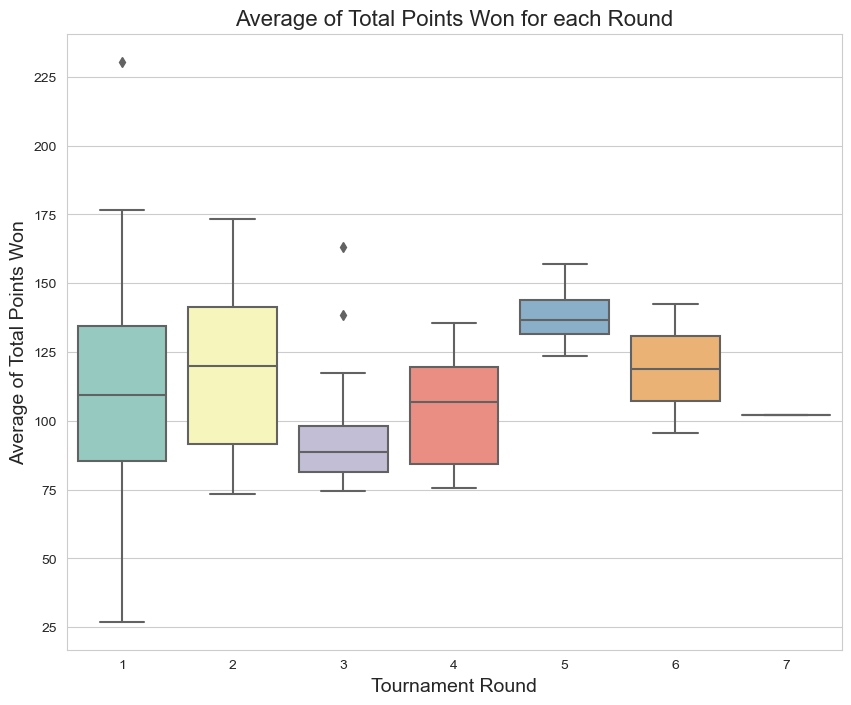

In [147]:
AusOpenMen['TPW_avg'] = (AusOpenMen['TPW.1'] + AusOpenMen['TPW.2']) / 2

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.boxplot(x='Round', y='TPW_avg', data=AusOpenMen, palette='Set3')
plt.xlabel('Tournament Round', fontsize=14)
plt.ylabel('Average of Total Points Won', fontsize=14)
plt.title('Average of Total Points Won for each Round', fontsize=16)
plt.show()

---

### Q2. What is the density-distribution of the point-winning shots and error-shots and what is the difference in mens tournaments compared to womens tournaments?

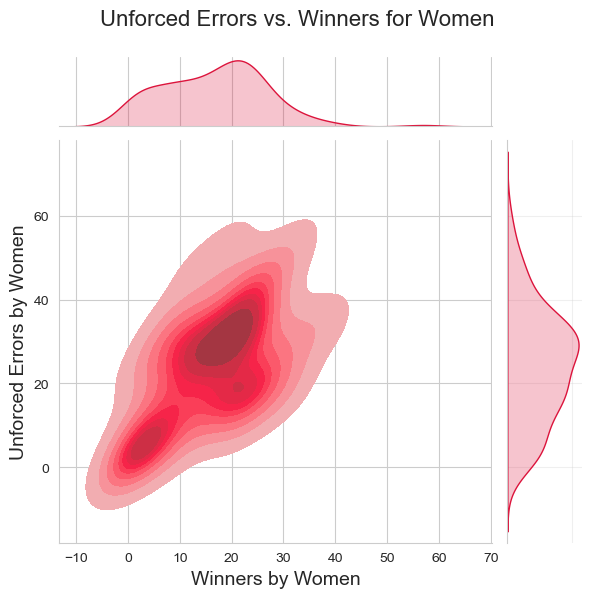

In [148]:
j = sns.jointplot(x='WNR.1', y='UFE.1', data=AusOpenWomen, kind='kde', color='crimson', fill=True)
j.set_axis_labels(xlabel='Winners by Women', ylabel='Unforced Errors by Women', fontsize=14)
j.fig.suptitle('Unforced Errors vs. Winners for Women', fontsize=16)

plt.grid(True, alpha=0.3)
plt.subplots_adjust(top=0.90)
plt.show()

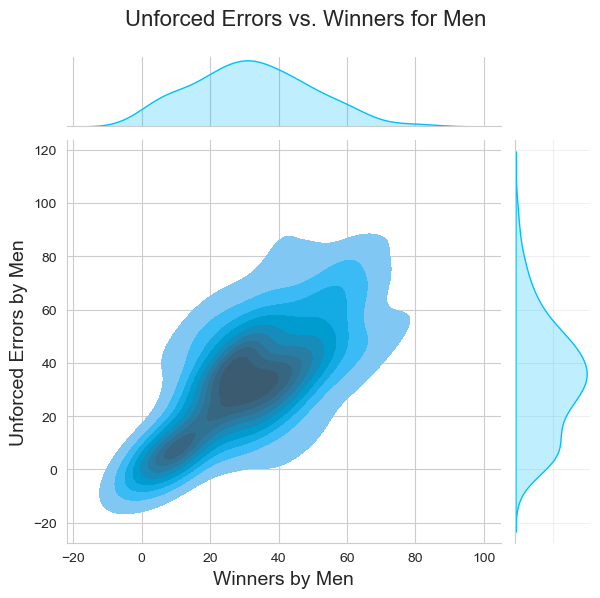

In [149]:
j = sns.jointplot(x='WNR.2', y='UFE.2', data=AusOpenMen, kind='kde', color='deepskyblue', fill=True)
j.set_axis_labels(xlabel='Winners by Men', ylabel='Unforced Errors by Men', fontsize=14)
j.fig.suptitle('Unforced Errors vs. Winners for Men', fontsize=16)

plt.grid(True, alpha=0.3)
plt.subplots_adjust(top=0.90)
plt.show()

---

### Q3. What is the trend of Double Faults by the players in each round of the Tournament?

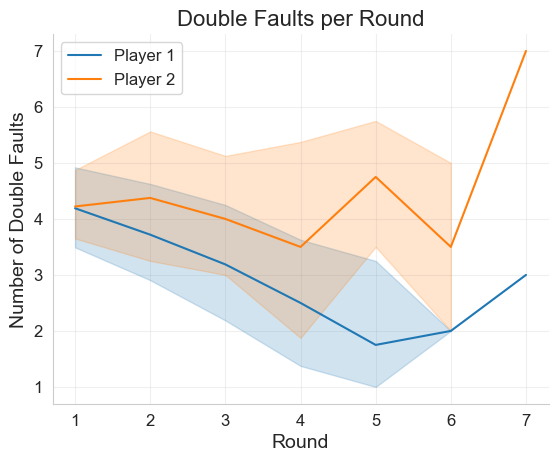

In [150]:
sns.set_style('whitegrid')
sns.lineplot(x='Round', y='DBF.1', data=AusOpenWomen, label='Player 1', color='tab:blue')
sns.lineplot(x='Round', y='DBF.2', data=AusOpenWomen, label='Player 2', color='tab:orange')

plt.xlabel('Round', fontsize=14)
plt.ylabel('Number of Double Faults', fontsize=14)
plt.title('Double Faults per Round', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

---

### Q4. What are the winning percentages on the second serve compared to the first serve for a player?

### Hypothesis – the second serve is less likely to win a point (Backfire effect)

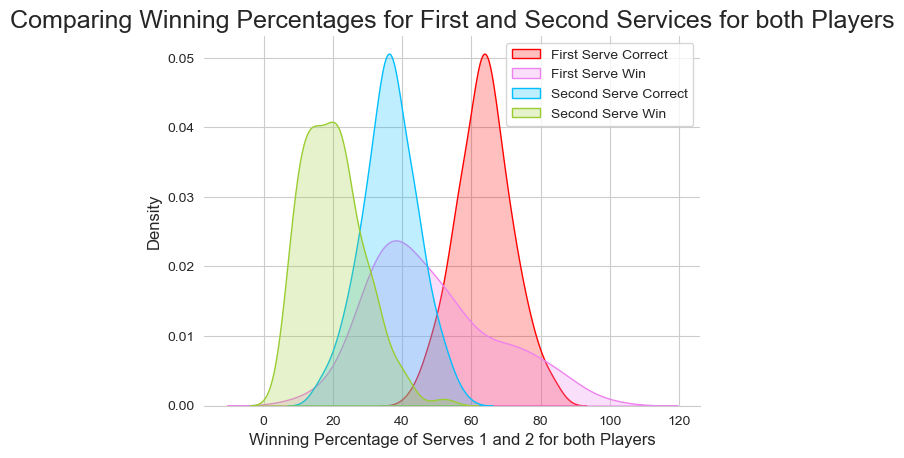

In [151]:
sns.set_style('whitegrid')
sns.kdeplot(FrenchOpenMen['FSP.1'], shade=True, color='red', label='First Serve Correct')
sns.kdeplot(FrenchOpenMen['FSW.1'], shade=True, color='violet', label='First Serve Win')
sns.kdeplot(FrenchOpenMen['SSP.1'], shade=True, color='deepskyblue', label='Second Serve Correct')
sns.kdeplot(FrenchOpenMen['SSW.1'], shade=True, color='yellowgreen', label='Second Serve Win')

sns.despine(left=True)
plt.xlabel('Winning Percentage of Serves 1 and 2 for both Players', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Comparing Winning Percentages for First and Second Services for both Players', fontsize=18)
plt.legend()
plt.show()

---

### Q5. What is the ratio of the Net Points won to the Net Points attempted and what is the trend for it progressing into the higher rounds of the tournament?

C:\Users\Akshat\AppData\Local\Temp\ipykernel_14388\2017766290.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratio = FrenchOpenWomen.groupby('Round')['NPW.1', 'NPA.1'].mean().apply(lambda x: x[0]/x[1], axis=1)


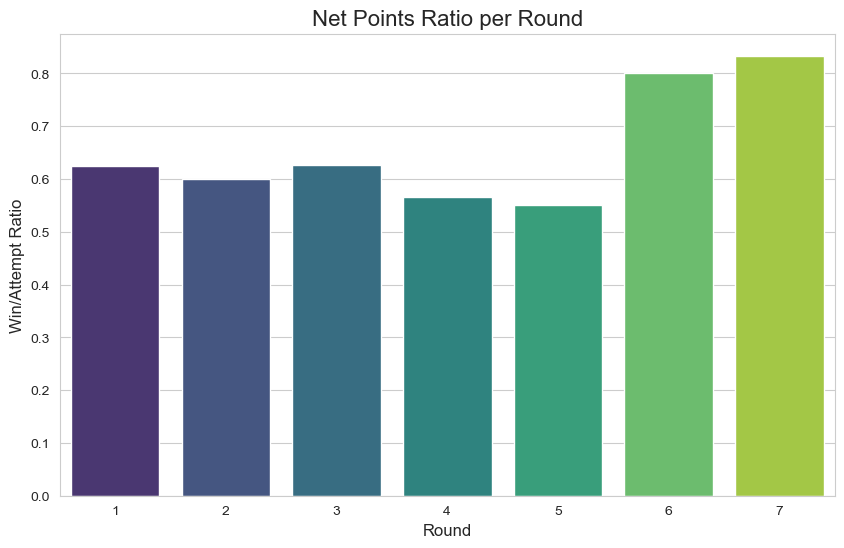

In [152]:
ratio = FrenchOpenWomen.groupby('Round')['NPW.1', 'NPA.1'].mean().apply(lambda x: x[0]/x[1], axis=1)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio.index, y=ratio.values, palette='viridis')

plt.xlabel('Round', fontsize=12)
plt.ylabel('Win/Attempt Ratio', fontsize=12)
plt.title('Net Points Ratio per Round', fontsize=16)
plt.show()

---

### Q6. What is the trend between the Total Points Won by Players 1 and 2 categorized by the outcome of the match?

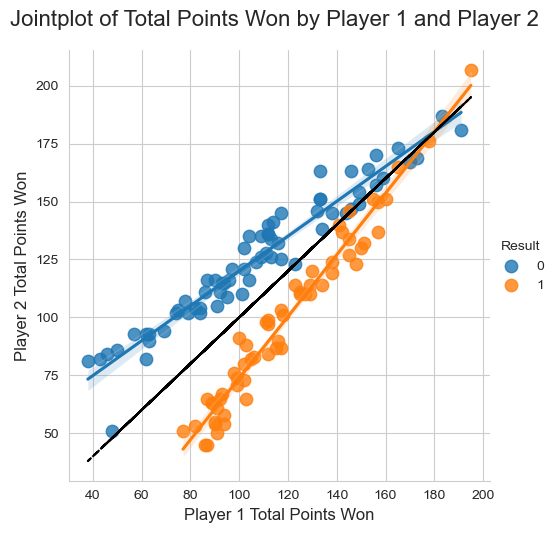

In [153]:
g = sns.lmplot(x='TPW.1', y='TPW.2', data=USOpenMen, hue='Result', fit_reg=True, scatter_kws={"s": 80})

x = USOpenMen['TPW.1']
y = USOpenMen['TPW.2']
slope, intercept = 1, 0

plt.plot(x, slope*x+intercept, 'k--')
plt.xlabel('Player 1 Total Points Won', fontsize=12)
plt.ylabel('Player 2 Total Points Won', fontsize=12)
plt.suptitle('Jointplot of Total Points Won by Player 1 and Player 2', fontsize=16, y=1.05)
plt.show()

---

### Q7. What is the correlation between the different attributes of Player 1 and the outcome of the match?

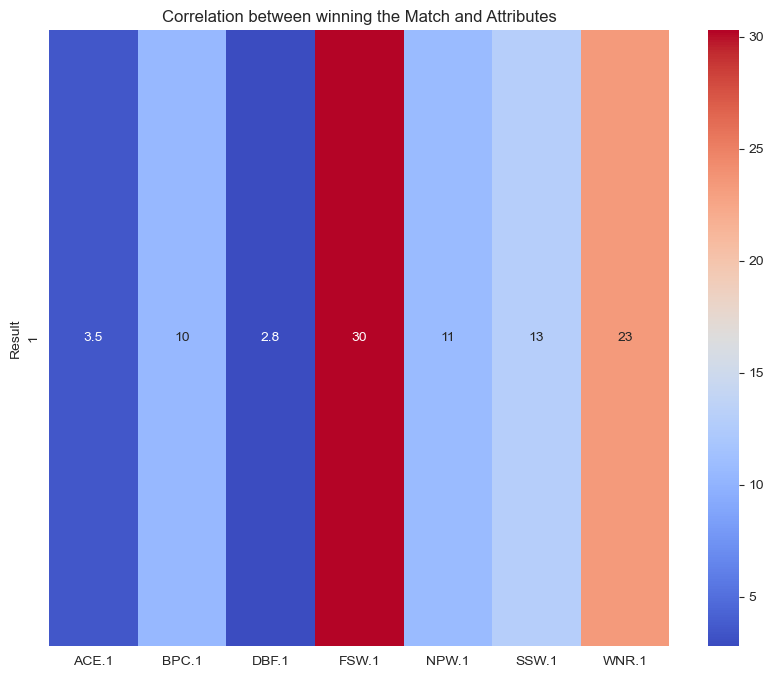

In [154]:
pivot_df = USOpenWomen[USOpenWomen['Result'] == 1].pivot_table(index='Result', values=['FSW.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'BPC.1', 'NPW.1'])

plt.figure(figsize=(10,8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True)
plt.title('Correlation between winning the Match and Attributes')
plt.show()

---

### Q8. How do the championship winners play, specifically the number of Aces hit by them?

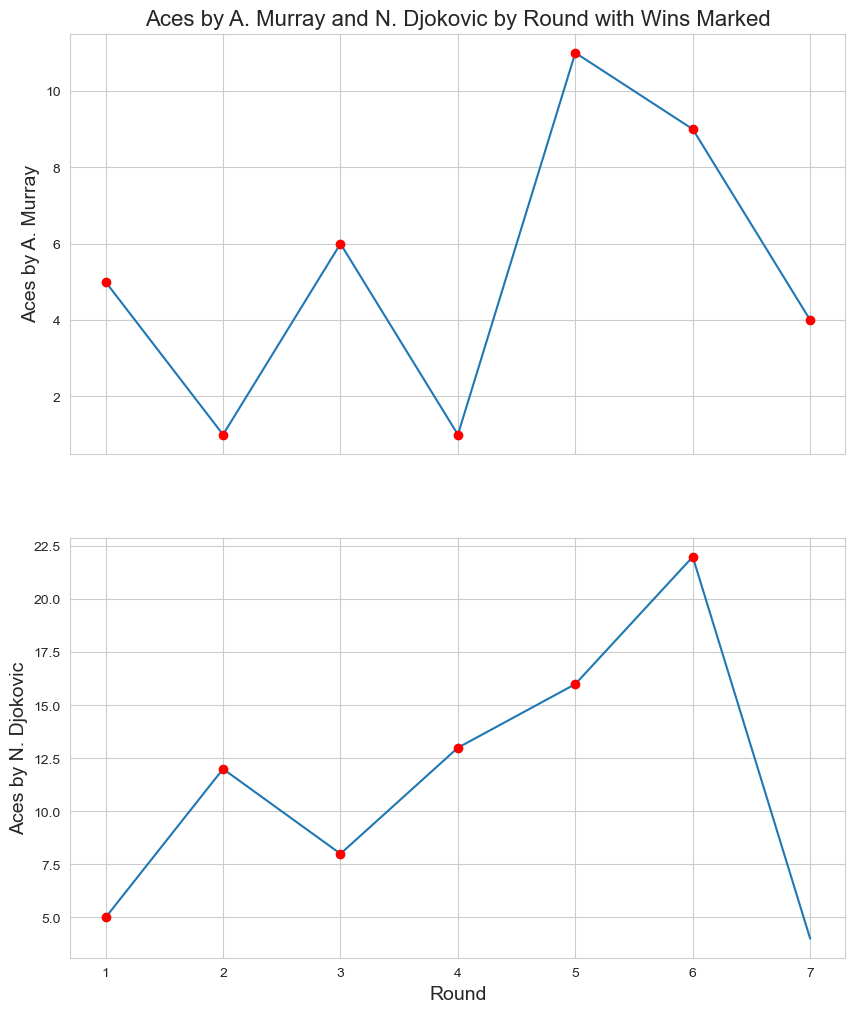

In [155]:
sns.set_style('whitegrid')

murray_matches = WimbledonOpenMen[(WimbledonOpenMen['Player2'] == 'A.Murray')]
djokovic_matches = WimbledonOpenMen[(WimbledonOpenMen['Player1'] == 'N.Djokovic')]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)
sns.lineplot(ax=axs[0], x='Round', y='ACE.1', data=murray_matches)

wins = murray_matches[murray_matches['Result'] == 0]['Round']
for win in wins:
    axs[0].plot(win, murray_matches[murray_matches['Round'] == win]['ACE.1'], 'o', color='red')
    
axs[0].set_ylabel('Aces by A. Murray', fontsize=14)
axs[0].set_title('Aces by A. Murray and N. Djokovic by Round with Wins Marked', fontsize=16)
sns.lineplot(ax=axs[1], x='Round', y='ACE.1', data=djokovic_matches)

wins = djokovic_matches[djokovic_matches['Result'] == 1]['Round']
for win in wins:
    axs[1].plot(win, djokovic_matches[djokovic_matches['Round'] == win]['ACE.1'], 'o', color='red')
    
axs[1].set_xlabel('Round', fontsize=14)
axs[1].set_ylabel('Aces by N. Djokovic', fontsize=14)

plt.show()

---